<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/EmergentRegulator004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

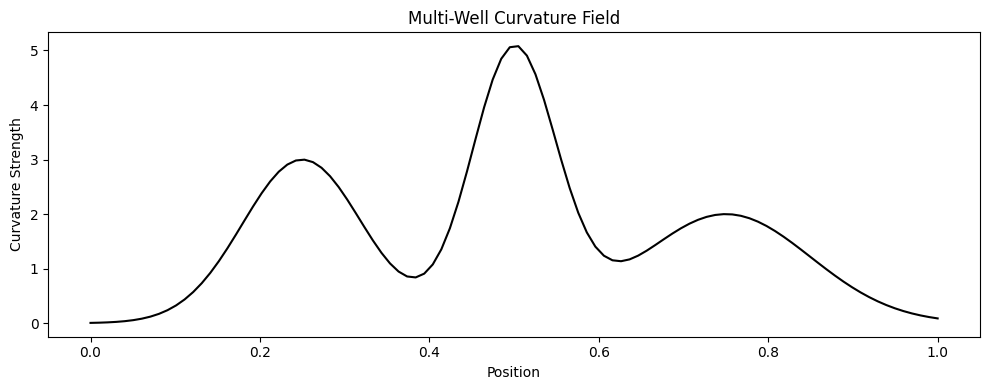

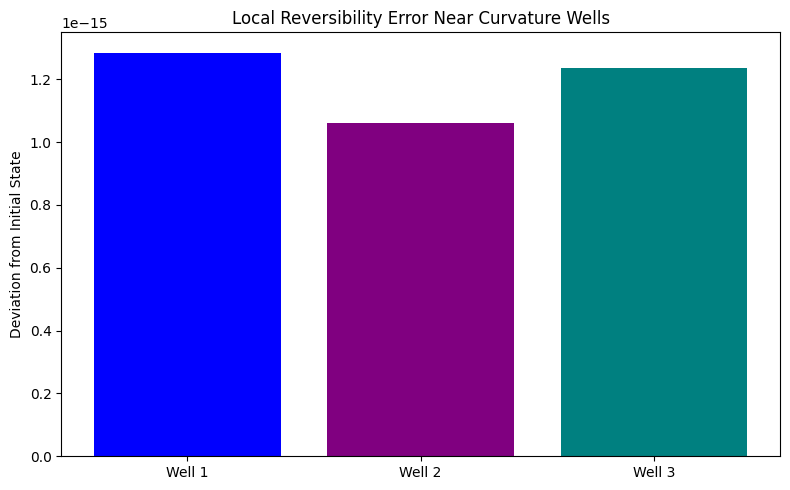

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100
T = 50
x = np.linspace(0, 1, N)
v0 = np.sin(2 * np.pi * x)

# Multi-well curvature field generator
def multi_well_field(wells):
    field = np.zeros_like(x)
    for center, strength, width in wells:
        field += strength * np.exp(-((x - center)**2) / width)
    return field

# Evolution with curvature-modulated noise
def evolve_forward(v_init, curvature, steps):
    traj = [v_init.copy()]
    v = v_init.copy()
    noises = []
    for _ in range(steps):
        noise = np.random.randn(N) * (1.0 / (1.0 + curvature))
        v += noise
        traj.append(v.copy())
        noises.append(noise)
    return np.array(traj), noises

# Reverse evolution
def evolve_reverse(v_final, curvature, noises):
    traj = [v_final.copy()]
    v = v_final.copy()
    for noise in reversed(noises):
        v -= noise
        traj.append(v.copy())
    return np.array(traj)

# Local deviation metric
def local_deviation(v_recovered, v_original, region):
    start, end = region
    return np.linalg.norm(v_recovered[start:end] - v_original[start:end])

# Define curvature wells
wells = [
    (0.25, 3.0, 0.01),
    (0.5, 5.0, 0.005),
    (0.75, 2.0, 0.02)
]
C = multi_well_field(wells)

# Run forward and reverse
forward_traj, noises = evolve_forward(v0, C, T)
reverse_traj = evolve_reverse(forward_traj[-1], C, noises)

# Define regions around wells
regions = [
    (int(0.20 * N), int(0.30 * N)),
    (int(0.45 * N), int(0.55 * N)),
    (int(0.70 * N), int(0.80 * N))
]
labels = ["Well 1", "Well 2", "Well 3"]
colors = ["blue", "purple", "teal"]

# Compute local deviations
deviations = [
    local_deviation(reverse_traj[-1], v0, region)
    for region in regions
]

# Plot curvature field
plt.figure(figsize=(10, 4))
plt.plot(x, C, color='black')
plt.title("Multi-Well Curvature Field")
plt.xlabel("Position")
plt.ylabel("Curvature Strength")
plt.tight_layout()
plt.show()

# Plot local reversibility errors
plt.figure(figsize=(8, 5))
plt.bar(labels, deviations, color=colors)
plt.title("Local Reversibility Error Near Curvature Wells")
plt.ylabel("Deviation from Initial State")
plt.tight_layout()
plt.show()
